In [70]:
import pandas as pd
import numpy as np

In [71]:
from google.colab import files
uploaded= files.upload()

Saving Crop_recommendation.csv to Crop_recommendation (1).csv


In [72]:
df=pd.read_csv('Crop_recommendation.csv')

In [73]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [74]:
df.shape

(2200, 8)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [76]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [77]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [78]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2195    False
2196    False
2197    False
2198    False
2199    False
Length: 2200, dtype: bool

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='rainfall', ylabel='Count'>

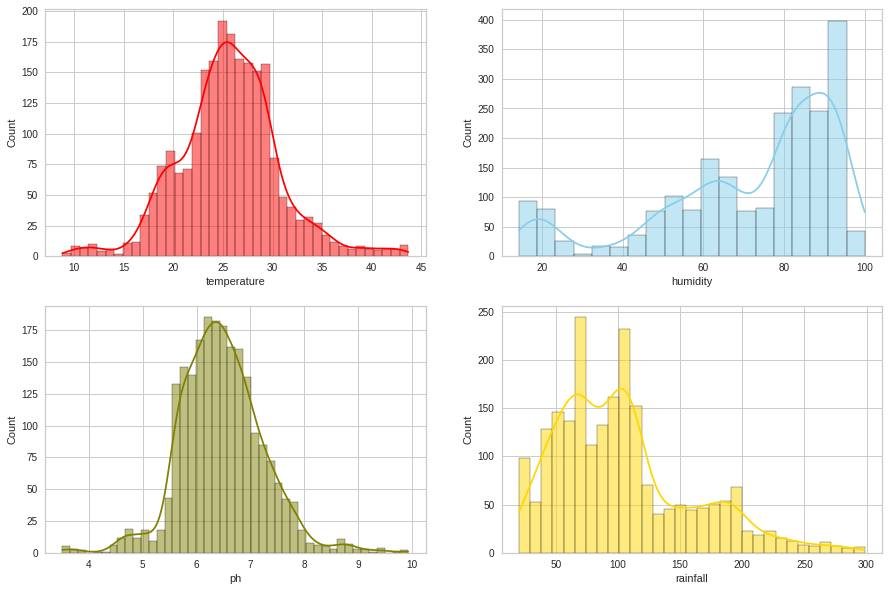

In [80]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
sns.histplot(data=df,x="temperature",kde=True,color="red",ax=axs[0,0])
sns.histplot(data=df,x="humidity",kde=True,color="skyblue",ax=axs[0,1])
sns.histplot(data=df,x="ph",kde=True,color="olive",ax=axs[1,0])
sns.histplot(data=df,x="rainfall",kde=True,color="gold",ax=axs[1,1])

<Axes: >

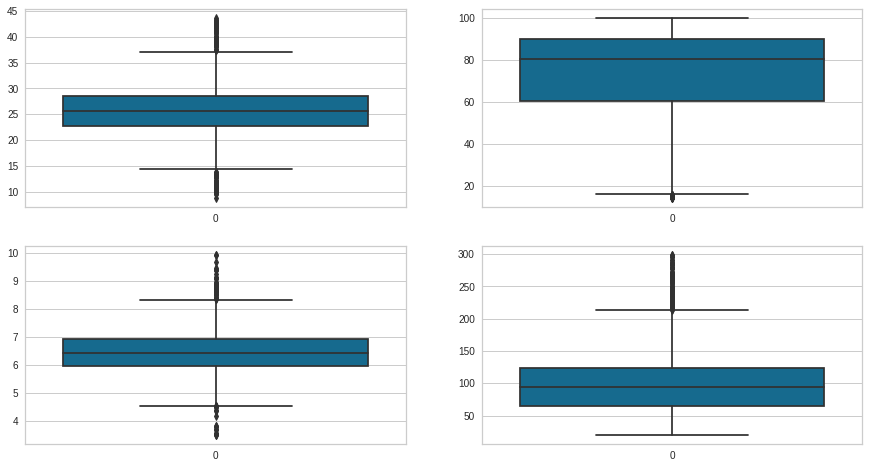

In [81]:
fig, axs = plt.subplots(2,2,figsize=(15,8))
sns.boxplot(df['temperature'],ax=axs[0,0])
sns.boxplot(df['humidity'],ax=axs[0,1])
sns.boxplot(df['ph'],ax=axs[1,0])
sns.boxplot(df['rainfall'],ax=axs[1,1])

In [82]:
qm25,qm50,qm75 = np.percentile(df['temperature'],[25,50,75])
iqrm = qm75 - qm25
minm= qm25 - 1.5*iqrm
maxm= qm75 + 1.5*iqrm
data= df[(df['temperature']>minm)&(df['temperature']< maxm )]

In [83]:
qm25,qm50,qm75 = np.percentile(df['humidity'],[25,50,75])
iqrm = qm75 - qm25
minm= qm25 - 1.5*iqrm
maxm= qm75 + 1.5*iqrm
data= df[(df['humidity']>minm)&(df['humidity']< maxm )]

In [84]:
qm25,qm50,qm75 = np.percentile(df['ph'],[25,50,75])
iqrm = qm75 - qm25
minm= qm25 - 1.5*iqrm
maxm= qm75 + 1.5*iqrm
data= df[(df['ph']>minm)&(df['ph']< maxm )]

In [85]:
qm25,qm50,qm75 = np.percentile(df['rainfall'],[25,50,75])
iqrm = qm75 - qm25
minm= qm25 - 1.5*iqrm
maxm= qm75 + 1.5*iqrm
data= df[(df['rainfall']>minm)&(df['rainfall']< maxm )]

In [86]:
data.shape

(2100, 8)

<Axes: xlabel='rainfall', ylabel='Count'>

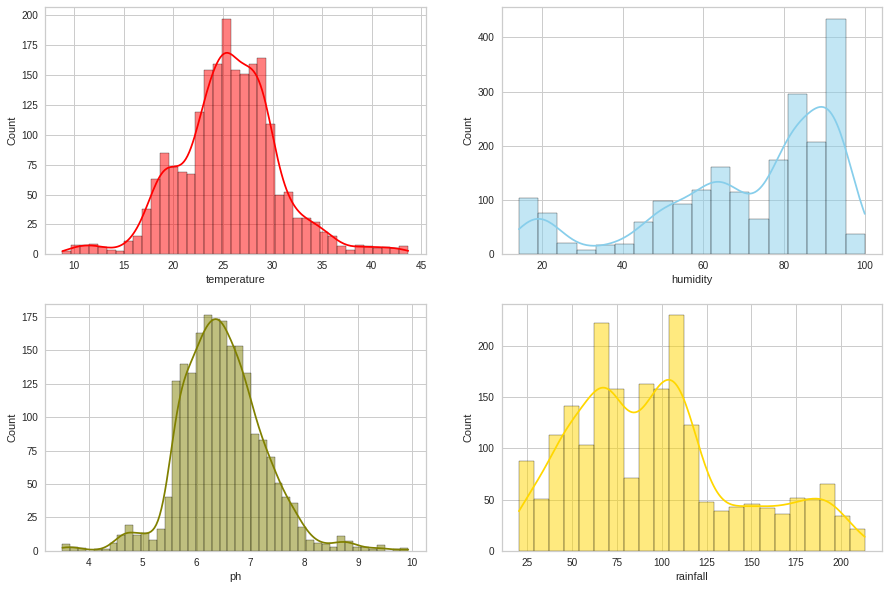

In [87]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
sns.histplot(data=data,x="temperature",kde=True,color="red",ax=axs[0,0])
sns.histplot(data=data,x="humidity",kde=True,color="skyblue",ax=axs[0,1])
sns.histplot(data=data,x="ph",kde=True,color="olive",ax=axs[1,0])
sns.histplot(data=data,x="rainfall",kde=True,color="gold",ax=axs[1,1])

<Axes: >

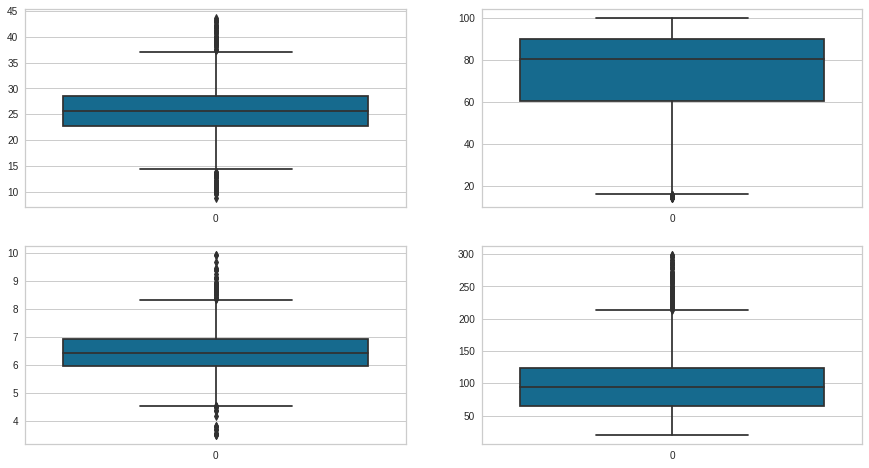

In [88]:
fig, axs = plt.subplots(2,2,figsize=(15,8))
sns.boxplot(data['temperature'],ax=axs[0,0])
sns.boxplot(df['humidity'],ax=axs[0,1])
sns.boxplot(df['ph'],ax=axs[1,0])
sns.boxplot(df['rainfall'],ax=axs[1,1])

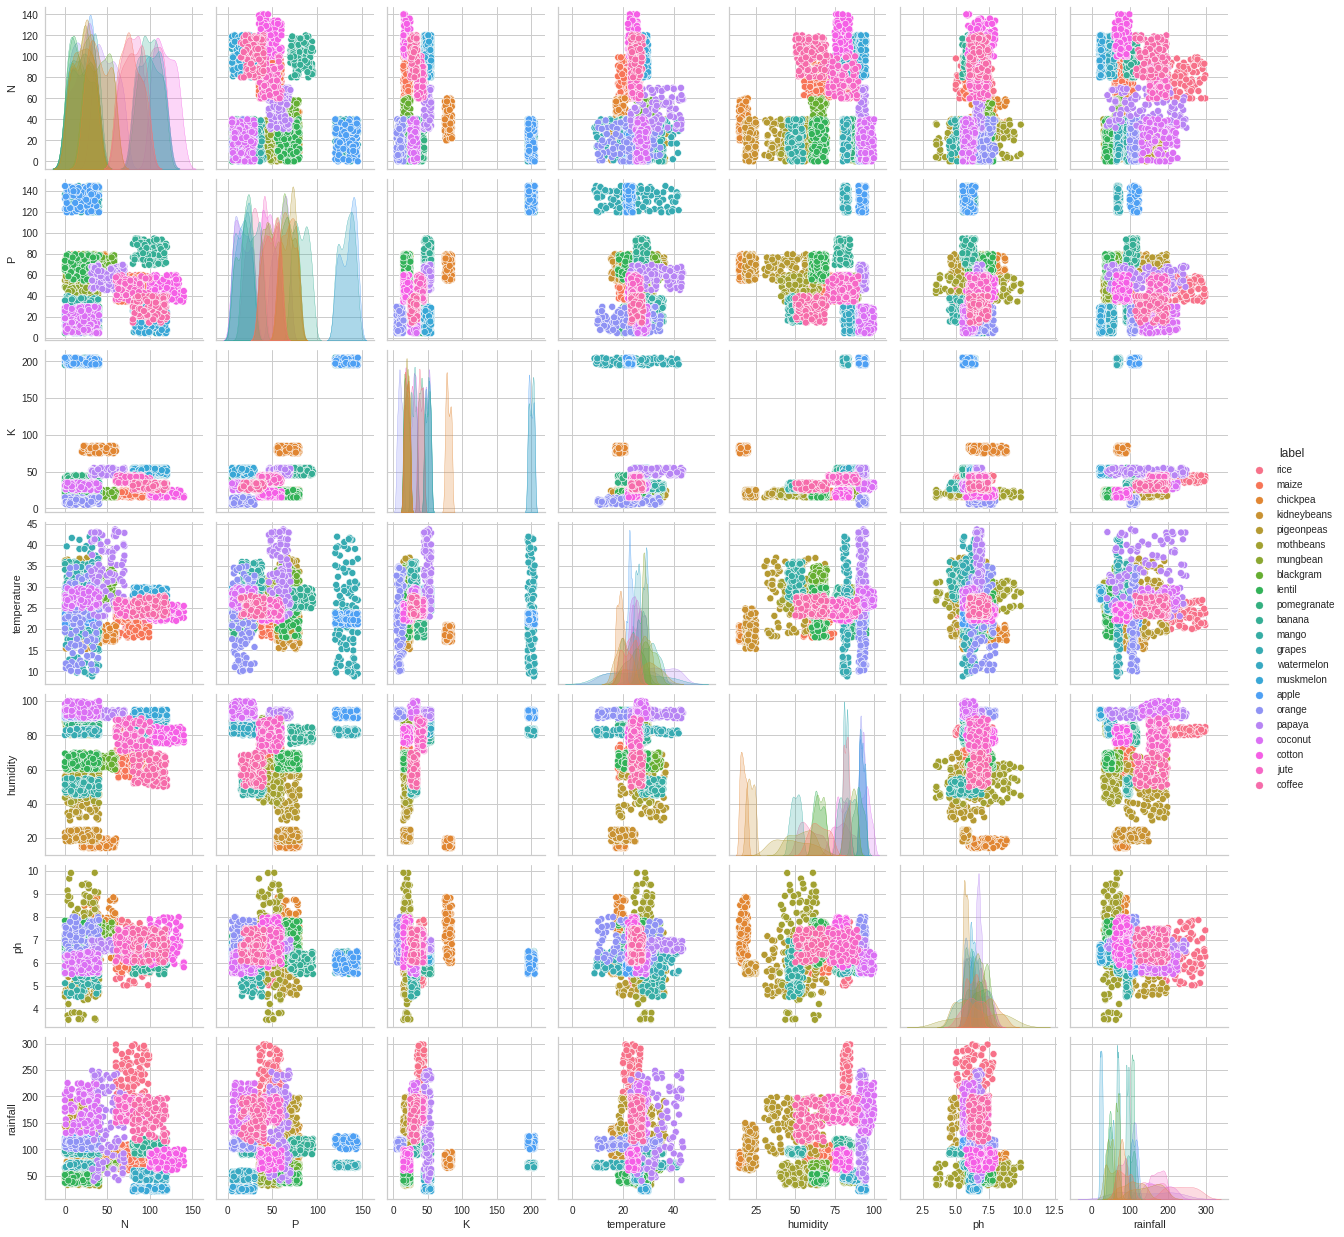

In [89]:
sns.pairplot(df, hue = 'label')

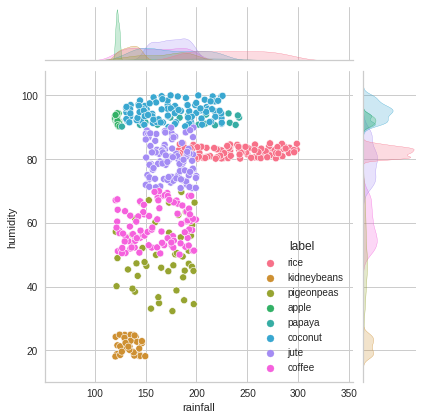

In [90]:
sns.jointplot(x="rainfall",y="humidity",data=df[(df['temperature']<30) & (df['rainfall']>120)],hue="label")

In [91]:
c=df.label.astype('category')
targets = dict(enumerate(c.cat.categories))
df['target']=c.cat.codes

y=df.target
X=df[['N','P','K','temperature','humidity','ph','rainfall']]

<Axes: >

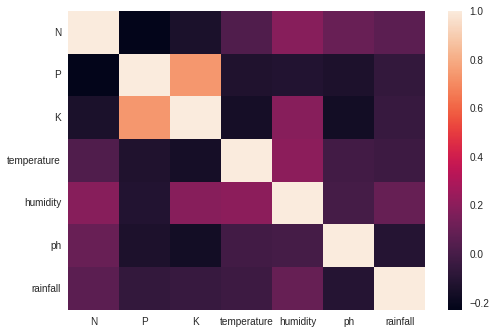

In [92]:
sns.heatmap(X.corr())

In [93]:
df.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [94]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(data,random_state=1,test_size=0.25)

In [95]:
X_train = train[['N','P','K','temperature','humidity','ph','rainfall']]
y_train=train.label
X_test= test[['N','P','K','temperature','humidity','ph','rainfall']]
y_test =test.label

#K -NEAREST Neighbor ALGO
 

In [96]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y=knn.score(X_test, y_test)
print(y)

0.9847619047619047


#SVM 

In [97]:
from sklearn import svm

clf = svm.SVC(kernel='poly',gamma="auto",C=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn import metrics

print("Accuracy for poly:",metrics.accuracy_score(y_test, y_pred))

Accuracy for poly: 0.9961904761904762


#CONFUSION MATRIX

In [98]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [99]:
y_pred

array(['orange', 'watermelon', 'mungbean', 'banana', 'orange', 'mango',
       'coconut', 'jute', 'pomegranate', 'blackgram', 'pomegranate',
       'banana', 'lentil', 'blackgram', 'lentil', 'apple', 'orange',
       'kidneybeans', 'banana', 'watermelon', 'muskmelon', 'mungbean',
       'kidneybeans', 'pomegranate', 'pomegranate', 'orange', 'chickpea',
       'pigeonpeas', 'papaya', 'coffee', 'pigeonpeas', 'watermelon',
       'jute', 'mothbeans', 'maize', 'blackgram', 'pigeonpeas', 'coconut',
       'coconut', 'coconut', 'kidneybeans', 'maize', 'banana', 'coconut',
       'muskmelon', 'blackgram', 'kidneybeans', 'orange', 'banana',
       'grapes', 'banana', 'apple', 'blackgram', 'chickpea', 'orange',
       'grapes', 'pigeonpeas', 'apple', 'mothbeans', 'muskmelon',
       'watermelon', 'lentil', 'orange', 'mothbeans', 'grapes', 'orange',
       'papaya', 'coconut', 'coconut', 'pomegranate', 'kidneybeans',
       'mungbean', 'muskmelon', 'jute', 'papaya', 'cotton', 'chickpea',
       

#DECISION TREE

In [100]:
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(max_depth=10)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

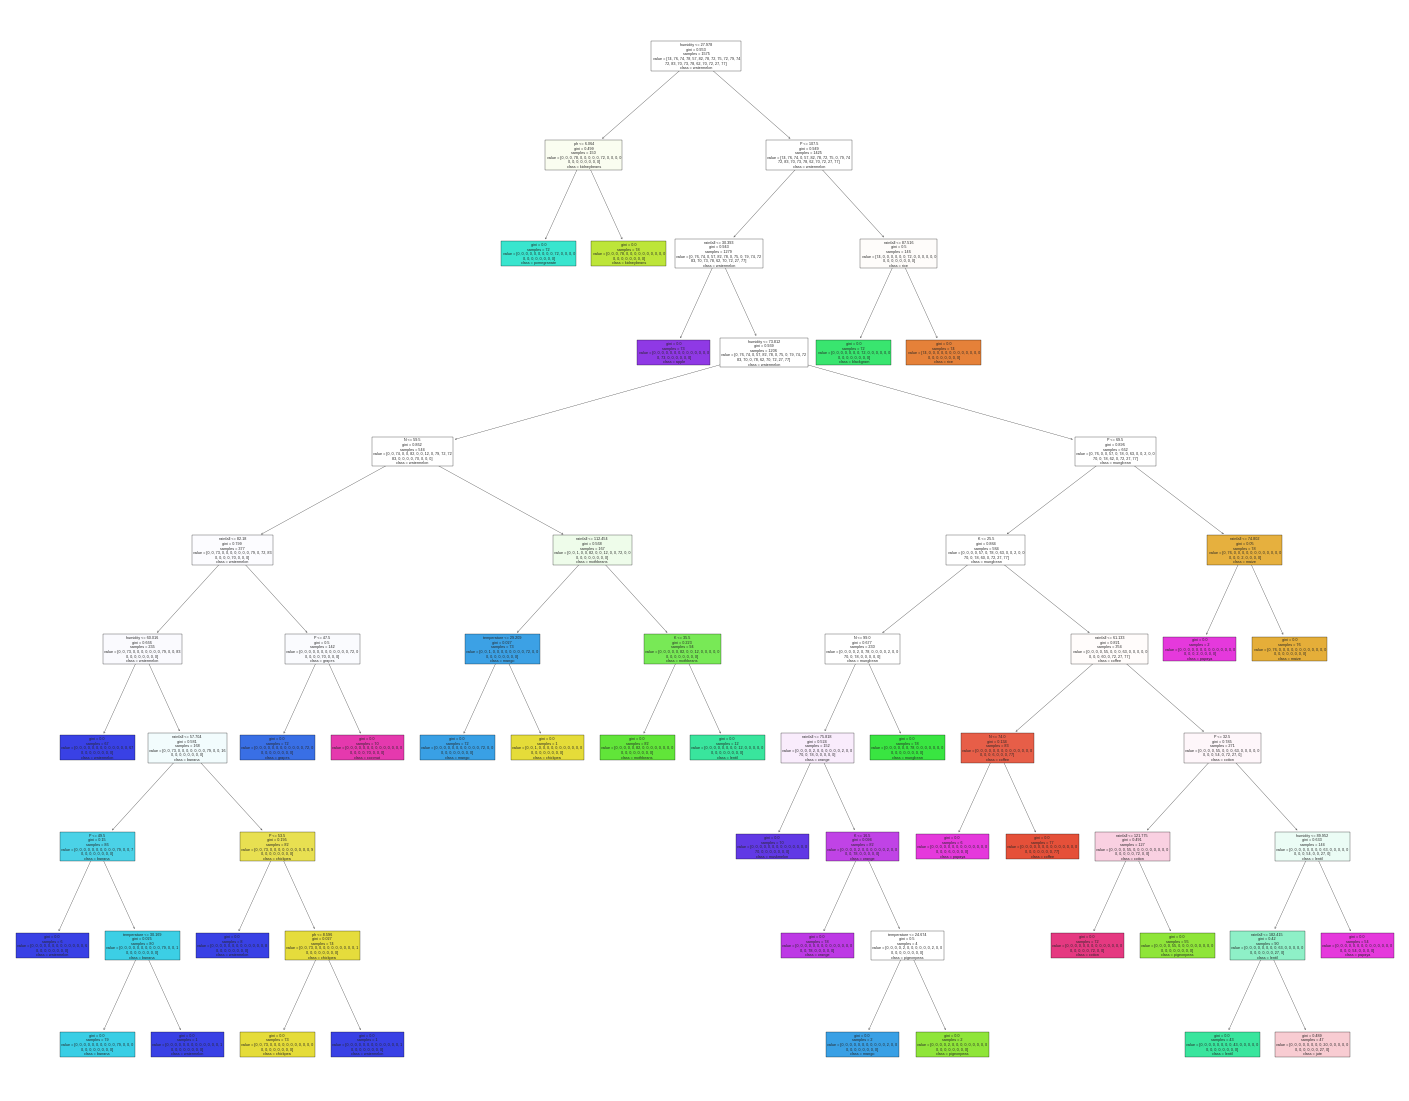

In [101]:
from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20)),tree.plot_tree(dt,feature_names=df.columns,class_names=['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],filled=True)

In [102]:
from sklearn.metrics import accuracy_score
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)
print(accuracy_score(y_test, y_test_pred))

0.9771428571428571


In [103]:
dt = DecisionTreeClassifier(random_state=42)
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [104]:
print(grid_search.best_estimator_)
print(accuracy_score(y_test, grid_search.best_estimator_.predict(X_test)))

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, random_state=42)
0.9866666666666667


#RANDOM FOREST

In [105]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)  
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn import metrics  
print()
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.9980952380952381


#Gradient Boosting

In [106]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier().fit(X_train, y_train)
print('Gradient Boosting accuracy : {}'.format(grad.score(X_test,y_test)))

Gradient Boosting accuracy : 0.9904761904761905


#Classification Report

In [107]:
from sklearn.metrics import classification_report
classes=list(targets.values())
print(classification_report(y_test, y_pred, target_names=classes))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        26
      banana       1.00      1.00      1.00        24
   blackgram       1.00      1.00      1.00        26
    chickpea       1.00      1.00      1.00        22
     coconut       1.00      1.00      1.00        28
      coffee       1.00      1.00      1.00        18
      cotton       1.00      1.00      1.00        22
      grapes       1.00      1.00      1.00        28
        jute       0.96      1.00      0.98        25
 kidneybeans       1.00      1.00      1.00        28
      lentil       1.00      1.00      1.00        21
       maize       1.00      1.00      1.00        26
       mango       1.00      1.00      1.00        28
   mothbeans       1.00      1.00      1.00        17
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        27
      orange       1.00      1.00      1.00        22
      papaya       1.00    